In [1]:
import pytesseract

# Set the path to the Tesseract executable
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'  # Replace with the actual path

# Now you can use pytesseract.image_to_string as before


# MULTIPLE IMAGES

# converting multiple images to grey scale

In [3]:
from PIL import Image
import os

def convert_to_grayscale(input_path, output_path):
    # Open the image file
    original_image = Image.open(input_path)

    # Convert the image to grayscale
    grayscale_image = original_image.convert('L')

    # Save the grayscale image with the correct file extension
    output_image_path = os.path.join(output_path, f"{os.path.splitext(os.path.basename(input_path))[0]}_greyscale.png")
    grayscale_image.save(output_image_path)

    print(f"Image converted to grayscale and saved at {output_image_path}")

def process_multiple_images(input_folder, output_folder):
    # Get a list of all image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Process each image
    for image_file in image_files:
        input_image_path = os.path.join(input_folder, image_file)
        convert_to_grayscale(input_image_path, output_folder)

# Example usage
input_folder_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\data"
output_folder_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\greyscale"

process_multiple_images(input_folder_path, output_folder_path)


NameError: name 'cv2' is not defined

# extracting the text from the image

In [3]:
from PIL import Image
import pytesseract
import os

def preprocess_image(image_path):
    # Open the image file
    image = Image.open(image_path)

    return image

def extract_text_from_image(image_path):
    # Preprocess the image
    preprocessed_image = preprocess_image(image_path)

    # Use Tesseract to extract text
    extracted_text = pytesseract.image_to_string(preprocessed_image)

    return extracted_text

def process_multiple_images(input_folder):
    # Get a list of all image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Process each image
    for image_file in image_files:
        input_image_path = os.path.join(input_folder, image_file)
        extracted_text = extract_text_from_image(input_image_path)

        print(f"Extracted Text from {image_file}:")
        print(extracted_text)
        print("\n" + "-"*30 + "\n")  # Separator for better visibility

# Example usage
input_folder_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\greyscale"

process_multiple_images(input_folder_path)


Extracted Text from 1_greyscale.png:
INCOME TAX DEPARTMENT 2 GOVTOFIND

tard eran Ae TS
Permanent Account Number Card

CFAPG1415C
ama / Name

PAVAN KUMAR GODDATI

ffrat @1 ATH / Father's Name

DHANAYYA GODDATI

wa 1 ariter/ Date che
12/03/1999 fonts

‘Fema / Signature


------------------------------

Extracted Text from 2_greyscale.png:
‘Si

sae faq
INCOME TAX DEPARTMENT
tareat CAT AAT Hrs

Permanent Account Number Card

Ad UXHy
GOVT. OF INDIA

aTa / Name

KAKARLA SANDEEP

foal aT aT / Father's Name

RAMAKRISHNA KAKARLA

Fs pr eal ae or ip , a ,
30/08/2000 .. at / Signature ; ee ne: a



------------------------------

Extracted Text from 3_greyscale.png:
INCOME TAX DEPARTMENT 2 GOVT. OF INDIA

tart Cal Bea HATS
Permanent Account Number Card
BFAPL9762A
aTa / Name
SELHUVO LOHE
frat aT ‘Ta / Father's Name * a Ter
CHINEY!I LOHE
16012020

wer at ara ‘
Date of Birth Pi S 4 fo
10/09/2004

£ SeaTa / Signature


------------------------------

Extracted Text from 4_greyscale.png:
Ssraeax faan

# save the text in csv file 

In [4]:
import pytesseract
from PIL import Image
import re
import pandas as pd
import os

def preprocess_image(image_path):
    # Open the image file
    image = Image.open(image_path)
    return image

def extract_details_from_text(text):
    # Define the patterns for extraction
    pan_pattern = re.compile(r'[A-Z]{5}[0-9]{4}[A-Z]')
    name_pattern = re.compile(r'(?<=Name\s)[\w\s]+')
    father_name_pattern = re.compile(r"(?<=Father's Name\s)[^\d]+")
    dob_pattern = re.compile(r'\d+/\d+/\d+')
    signature_pattern = re.compile(r'Signature')

    # Check if signature is present
    signature_present = bool(signature_pattern.search(text))

    # Extracted data
    pan = pan_pattern.search(text).group() if pan_pattern.search(text) else None
    name_match = name_pattern.search(text)
    name = name_match.group().strip() if name_match else None

    father_name_match = father_name_pattern.search(text)
    father_name = father_name_match.group().strip() if father_name_match else None

    # Remove specific text from Name and Father's Name
    unwanted_text_name = ['\n\nwa FI arirer', '\nfrat', '\n\nfrat', ' FI arirer/ Date', 'See\nara ft arfre r y...',
                          'sai\n', '\n\nat artrer\nDate of Sith', '\n\nav —\na= wi aTé...']
    
    for text_to_remove in unwanted_text_name:
        name = name.replace(text_to_remove, '')
        father_name = father_name.replace(text_to_remove, '')

    # Remove specific text from Father's Name
    unwanted_text_father = ['/ Date', 'See\nara ft arfre r ye z...', '\n\nav —\na= wi aTé...']
    for text_to_remove in unwanted_text_father:
        father_name = father_name.replace(text_to_remove, '')

    # Replace characters in Father's Name
    father_name = father_name.replace(']', 'I').replace('!', 'I')

    # Further cleaning of Name and Father's Name
    name = re.sub(r'[^A-Z\s]+', '', name)
    father_name = re.sub(r'[^A-Z\s]+', '', father_name)

    dob = dob_pattern.search(text).group() if dob_pattern.search(text) else None

    # Initialize a dictionary to hold the extracted data
    extracted_details = {
        'PAN': pan,
        'Name': name,
        "Father's Name": father_name,
        'DOB': dob,
        'Signature': 'Present' if signature_present else 'Absent'
    }

    return extracted_details

def process_multiple_images(input_folder, output_folder):
    # Get a list of all image files in the input folder
    image_files = [f for f in os.listdir(input_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # Initialize an empty DataFrame to store the results
    all_extracted_details = pd.DataFrame()

    # Process each image
    for image_file in image_files:
        input_image_path = os.path.join(input_folder, image_file)
        extracted_text = pytesseract.image_to_string(preprocess_image(input_image_path))
        extracted_details = extract_details_from_text(extracted_text)

        # Append the extracted details to the DataFrame
        all_extracted_details = all_extracted_details.append(extracted_details, ignore_index=True)

    # Specify the output file path and save the DataFrame to a CSV file
    output_file_path = os.path.join(output_folder, "pan_details_multi_images.csv")
    all_extracted_details.to_csv(output_file_path, index=False)

    print(f"\nDataFrame saved to: {output_file_path}")
    print(all_extracted_details)

# Example usage
input_folder_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\greyscale"
output_folder_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\im"

process_multiple_images(input_folder_path, output_folder_path)


C:\Users\GP mysore\AppData\Local\Temp\ipykernel_19168\1569915629.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_extracted_details = all_extracted_details.append(extracted_details, ignore_index=True)
C:\Users\GP mysore\AppData\Local\Temp\ipykernel_19168\1569915629.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_extracted_details = all_extracted_details.append(extracted_details, ignore_index=True)
C:\Users\GP mysore\AppData\Local\Temp\ipykernel_19168\1569915629.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_extracted_details = all_extracted_details.append(extracted_details, ignore_index=True)
C:\Users\GP mysore\AppData\Local\Temp\ipykernel_19168\1569915629.py:78: FutureWarning: The frame.append me


DataFrame saved to: C:\Users\GP mysore\OneDrive\Desktop\pan card\im\pan_details_multi_images.csv
          PAN                                  Name  \
0  CFAPG1415C               PAVAN KUMAR GODDATI\n\n   
1        None               KAKARLA SANDEEP\n\n T T   
2  BFAPL9762A                        SELHUVO LOHE T   
3  CJAPA7472D  ABBAVARAM HARSHA VARDHAN REDDY\n\n     
4  FOGPB4307Q                      M BASAVARAJU\n\n   

                          Father's Name         DOB Signature  
0                  DHANAYYA GODDATI\n\n  12/03/1999   Present  
1      RAMAKRISHNA KAKARLA\n\nF          30/08/2000   Present  
2                      T\nCHINEYII LOHE  10/09/2004   Present  
3  RAVI SANKAR REDDY ABBAVARAM\n\n  \n   14/08/1998   Present  
4               MATAM SARANAIAH\n\nW     06/06/2001    Absent  


C:\Users\GP mysore\AppData\Local\Temp\ipykernel_19168\1569915629.py:78: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_extracted_details = all_extracted_details.append(extracted_details, ignore_index=True)


# loading the csv file

In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\GP mysore\OneDrive\Desktop\pan card\im\pan_details_multi_images.csv")
df

,PAN,Name,Father's Name,DOB,Signature
0,CFAPG1415C,PAVAN KUMAR GODDATI\n\n,DHANAYYA GODDATI\n\n,12/03/1999,Present
1,NaN,KAKARLA SANDEEP\n\n T T,RAMAKRISHNA KAKARLA\n\nF,30/08/2000,Present
2,BFAPL9762A,SELHUVO LOHE T,T\nCHINEYII LOHE,10/09/2004,Present
3,CJAPA7472D,ABBAVARAM HARSHA VARDHAN REDDY\n\n,RAVI SANKAR REDDY ABBAVARAM\n\n \n,14/08/1998,Present
4,FOGPB4307Q,M BASAVARAJU\n\n,MATAM SARANAIAH\n\nW,06/06/2001,Absent


# removing unwanted text from father's name and name column

## name:

In [6]:
# List of words to replace in the 'Father's Name' column
words_to_replace = ['\n\n' ,'  T T',' T']  # Add more words as needed

# Replace words in the 'Father's Name' column for the entire DataFrame
for word in words_to_replace:
    df["Name"] = df["Name"].apply(lambda x: x.replace(word, ' '))

# Display the resulting DataFrame
df


,PAN,Name,Father's Name,DOB,Signature
0,CFAPG1415C,PAVAN KUMAR GODDATI,DHANAYYA GODDATI\n\n,12/03/1999,Present
1,NaN,KAKARLA SANDEEP,RAMAKRISHNA KAKARLA\n\nF,30/08/2000,Present
2,BFAPL9762A,SELHUVO LOHE,T\nCHINEYII LOHE,10/09/2004,Present
3,CJAPA7472D,ABBAVARAM HARSHA VARDHAN REDDY,RAVI SANKAR REDDY ABBAVARAM\n\n \n,14/08/1998,Present
4,FOGPB4307Q,M BASAVARAJU,MATAM SARANAIAH\n\nW,06/06/2001,Absent


## father's name

In [7]:
# List of words to replace in the 'Father's Name' column
words_to_replace = ['\n\n', '\n    B ', '  T\n', 'F','\n\nW','W',' \n']  # Add more words as needed

# Replace words in the 'Father's Name' column for the entire DataFrame
for word in words_to_replace:
    df["Father's Name"] = df["Father's Name"].apply(lambda x: x.replace(word, ' '))

# Display the resulting DataFrame
df


,PAN,Name,Father's Name,DOB,Signature
0,CFAPG1415C,PAVAN KUMAR GODDATI,DHANAYYA GODDATI,12/03/1999,Present
1,NaN,KAKARLA SANDEEP,RAMAKRISHNA KAKARLA,30/08/2000,Present
2,BFAPL9762A,SELHUVO LOHE,CHINEYII LOHE,10/09/2004,Present
3,CJAPA7472D,ABBAVARAM HARSHA VARDHAN REDDY,RAVI SANKAR REDDY ABBAVARAM,14/08/1998,Present
4,FOGPB4307Q,M BASAVARAJU,MATAM SARANAIAH,06/06/2001,Absent


## checking the coordinates of the image and displaying the image

In [8]:
import cv2
import os

def disp_img(img, window_name='Image'):
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Path to the directory containing your images
directory_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\data"

# Iterate through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Read the image
        img = cv2.imread(file_path)

        # Display the image
        disp_img(img, window_name=filename)

        # Get the coordinates of the image
        height, width, channels = img.shape
        print(f"Image: {filename}")
        print(f"Coordinates: (0, 0) - ({width}, {height})\n")

# Destroy any remaining OpenCV windows
cv2.destroyAllWindows()


Image: 1.png
Coordinates: (0, 0) - (765, 526)

Image: 2.jpg
Coordinates: (0, 0) - (1219, 772)

Image: 3.png
Coordinates: (0, 0) - (1164, 800)

Image: 4.jpg
Coordinates: (0, 0) - (1600, 983)

Image: 5.jpg
Coordinates: (0, 0) - (2707, 1713)



## resize the image into same size

In [9]:
import cv2
import os

def disp_img(img, window_name='Image'):
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def resize_image(img, target_size=(800, 600)):
    return cv2.resize(img, target_size)

# Path to the directory containing your images
directory_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\data"

# Common target size for resizing
target_size = (800, 600)

# Iterate through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith(".png") or filename.endswith(".jpg"):
        # Construct the full file path
        file_path = os.path.join(directory_path, filename)

        # Read the image
        img = cv2.imread(file_path)

        # Resize the image
        resized_img = resize_image(img, target_size)

        # Display the resized image
        disp_img(resized_img, window_name=filename)

        # Get the coordinates of the resized image
        height, width, channels = resized_img.shape
        print(f"Image: {filename}")
        print(f"Resized Coordinates: (0, 0) - ({width}, {height})\n")

# Destroy any remaining OpenCV windows
cv2.destroyAllWindows()


Image: 1.png
Resized Coordinates: (0, 0) - (800, 600)

Image: 2.jpg
Resized Coordinates: (0, 0) - (800, 600)

Image: 3.png
Resized Coordinates: (0, 0) - (800, 600)

Image: 4.jpg
Resized Coordinates: (0, 0) - (800, 600)

Image: 5.jpg
Resized Coordinates: (0, 0) - (800, 600)



# display the image

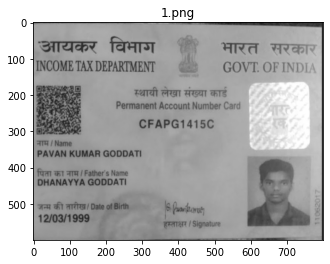

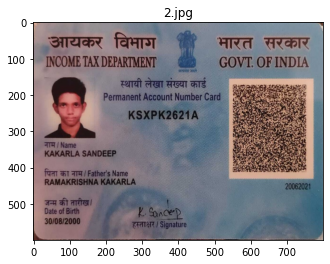

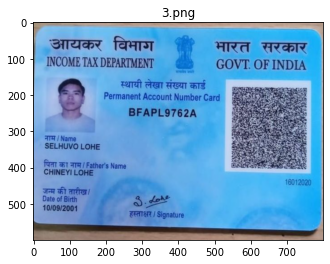

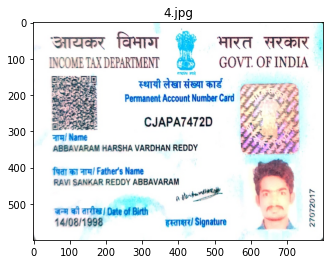

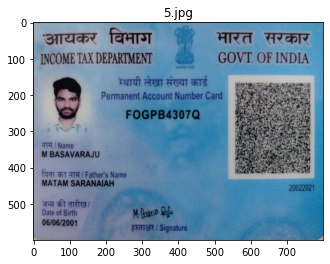

In [10]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

def display_images_from_folder(folder_path):
    # Get a list of all files in the folder
    file_list = os.listdir(folder_path)

    # Filter out only image files (assuming they have extensions like .png, .jpg, .jpeg, etc.)
    image_files = [f for f in file_list if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print("No image files found in the specified folder.")
        return

    # Display each image in a loop
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)

        # Load the image
        img = mpimg.imread(image_path)

        # Check if the image is in portrait orientation, and rotate it to landscape
        if img.shape[0] > img.shape[1]:
            img = np.rot90(img)

        # Display the rotated image
        plt.imshow(img)
        plt.title(image_file)
        plt.show()

# Replace 'path/to/your/folder' with the actual path to your folder containing PAN card images
folder_path =r"C:\Users\GP mysore\OneDrive\Desktop\pan card\resized_images"
display_images_from_folder(folder_path)


# crop the image

In [16]:
import cv2
import os

def crop_and_save(image, output_path, coordinates):
    x, y, w, h = coordinates
    cropped_img = image[y:y+h, x:x+w]
    cv2.imwrite(output_path, cropped_img)

# Path to the directory containing your original images
input_directory_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\resized_images"

# Create a new directory for cropped signatures
output_directory_path = r"C:\Users\GP mysore\OneDrive\Desktop\pan card\cropped_signatures"
os.makedirs(output_directory_path, exist_ok=True)

# Coordinates for the signature region in each image (adjust these based on your needs)
signature_coordinates = {
    "1.png": (350, 530, 450, 600),
    "2.jpg": (250, 430, 490, 600),
    "3.png": (230, 430, 480, 600),
    "4.jpg": (350, 550, 300, 600),
    "5.jpg": (250, 450, 490, 600),
}

# Iterate through all files in the directory
for filename in os.listdir(input_directory_path):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        # Construct the full file paths
        input_file_path = os.path.join(input_directory_path, filename)
        output_file_path = os.path.join(output_directory_path, f"cropped_{filename}")

        # Check if the output file already exists
        if os.path.exists(output_file_path):
            print(f"Output file {output_file_path} already exists. Skipping...")
            continue

        # Read the image
        img = cv2.imread(input_file_path)

        # Get the coordinates for cropping
        if filename in signature_coordinates:
            coords = signature_coordinates[filename]

            # Crop the signature and save the cropped image
            crop_and_save(img, output_file_path, coords)

            print(f"Signature cropped and saved for {filename}")
        else:
            print(f"No coordinates provided for {filename}")

# Destroy any remaining OpenCV windows
cv2.destroyAllWindows()


Signature cropped and saved for 1.png
Signature cropped and saved for 2.jpg
Signature cropped and saved for 3.png
Signature cropped and saved for 4.jpg
Signature cropped and saved for 5.jpg
